In [91]:
from random import random, seed
from itertools import product
import numpy as np
from icecream import ic

from itertools import accumulate
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [92]:
def single_tweak( solution: np.ndarray , density: float ) -> np.ndarray: ### check better how works, can give u a warning based on that 
    new_sol= solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol


def multiple_mutation(solution: np.ndarray , density: float ) -> np.ndarray:
    mask = rng.random(NUM_SETS) < density
    new_solution = np.logical_xor( solution.copy() , mask ) 
    return new_solution

In [93]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype =np.logical_or.reduce(SETS[solution])
    return np.all( phenotype)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [94]:
def fitness(solution: np.ndarray):  # the fitness is not given by the problem
    validity = valid(solution)
    cost_func = -cost(solution)
    return (validity, cost_func)

In [95]:
def createSET_COSTS(NUM_SETS, UNIVERSE_SIZE, DENSITY):
    SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
    for s in range(UNIVERSE_SIZE):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(NUM_SETS), s] = True
    COSTS = np.pow(SETS.sum(axis=1), 1.1)
    return SETS, COSTS

In [56]:
"""
def experiment( Listobj ):
    global SETS, COSTS , NUM_SETS , UNIVERSE_SIZE , DENSITY , rng
    UNIVERSE_SIZE = Listobj[0]
    NUM_SETS = Listobj[1]
    DENSITY = Listobj[2]

    rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int( 10_000 * DENSITY)]))
    SETS, COSTS = createSET_COSTS(NUM_SETS, UNIVERSE_SIZE, DENSITY)
    MAX_STEPS = 10_000
    density_method= 1 - DENSITY  

    solution = rng.random(NUM_SETS) < DENSITY
    solution_fitness = fitness(solution)
    history= [solution_fitness[1]]
    ic(fitness(solution))

    tweak =  single_tweak

    for steps in tqdm(range(MAX_STEPS)):

        new_solution = tweak( solution, density_method)
        f = fitness(new_solution) 
        history.append(float(f[1]))
        global_counter=0
        counter=0
        if f > solution_fitness:
            solution = new_solution
            solution_fitness = fitness(solution)  
            ic(fitness(solution))
            density_method= density_method*0.95
            counter=0
        #elif(counter > MAX_STEPS*0.2): ##### the best idea is to modify than the size of the items and the number of steps * uses the .20 percente of the MAX_steps
        #    counter=0
        #    density_method= density_method*1.8
        #elif(global_counter> MAX_STEPS*0.9):
        #    tweak= single_tweak

        global_counter+=1
        counter+=1

    #ic(solution)
    ic(fitness(solution))

    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    plt.legend(loc='lower right', fontsize='large', shadow=True, 
               title=f"Hyper-parameter\nUniverse Size {UNIVERSE_SIZE}\nNum. Set {NUM_SETS}\nDensity {DENSITY}")
    _ = plt.scatter(range(len(history)), history, marker=".")

In [156]:
def experiment( Listobj ):
    global SETS, COSTS , NUM_SETS , UNIVERSE_SIZE , DENSITY , rng
    UNIVERSE_SIZE = Listobj[0]
    NUM_SETS = Listobj[1]
    DENSITY = Listobj[2]

    rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int( 10_000 * DENSITY)]))
    SETS, COSTS = createSET_COSTS(NUM_SETS, UNIVERSE_SIZE, DENSITY)
    MAX_STEPS = 10_000
    density_method= 0.01

    solution = rng.random(NUM_SETS) < DENSITY
    solution_fitness = fitness(solution)
    history= [solution_fitness[1]]
    ic(0, fitness(solution), np.sum(solution))

    tweak =  multiple_mutation
    global_counter=0
    for steps in tqdm(range(MAX_STEPS)):
        new_solution = tweak( solution, density_method)
        f = fitness(new_solution)     #  tuple 
        history.append(float(f[1]))
        
        counter=0
        if(fitness(solution)[0]==False and f[0]==False):
            count_true_sol = np.sum(solution)
            count_true_new_sol = np.sum(new_solution)
            if(count_true_new_sol> count_true_sol):
                solution= new_solution
                solution_fitness = fitness(solution)  
                ic(steps ,fitness(solution) , np.sum(solution))
                counter=0
        elif f > solution_fitness:   ### we check first the true value, after the value
            solution = new_solution
            solution_fitness = fitness(solution)  
            ic(steps ,fitness(solution), np.sum(solution))
            density_method= density_method*0.90
            counter=0
        if(counter > MAX_STEPS*0.02): ##### the best idea is to modify than the size of the items and the number of steps * uses the .20 percente of the MAX_steps
            counter=0
            density_method= density_method+((1-density_method)*0.5)
        if(global_counter> MAX_STEPS*0.9):
            tweak= single_tweak
            history= [solution_fitness[1]]
        global_counter+=1
        counter+=1
    #ic(solution)
    ic(fitness(solution))

    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    plt.legend(loc='lower right', fontsize='large', shadow=True, 
               title=f"Hyper-parameter\nUniverse Size {UNIVERSE_SIZE}\nNum. Set {NUM_SETS}\nDensity {DENSITY}")
    _ = plt.scatter(range(len(history)), history, marker=".")

In [157]:
experiment_ele = [ ( 100,  10 ,.2) , (1_000 ,100 ,.2) , ( 10_000, 1_000 ,.2) ,(100_000 ,10_000, .1), (100_000, 10_000 ,.2 ) , (100_000 , 10_000 ,.3)         ]

(10000, 1000, 0.2)


ic| 0: 0
    fitness(solution): (np.True_, np.float64(-797827.5280961245))
    np.sum(solution): np.int64(187)


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| steps: 16
    fitness(solution): (np.True_, np.float64(-797759.3743484755))
    np.sum(solution): np.int64(187)
ic| steps: 184
    fitness(solution): (np.True_, np.float64(-793628.0056554654))
    np.sum(solution): np.int64(186)
ic| steps: 189
    fitness(solution): (np.True_, np.float64(-793519.4838694149))
    np.sum(solution): np.int64(186)
ic| steps: 209
    fitness(solution): (np.True_, np.float64(-793385.4605592537))
    np.sum(solution): np.int64(186)
ic| steps: 231
    fitness(solution): (np.True_, np.float64(-784659.6830873422))
    np.sum(solution): np.int64(184)
ic| steps: 254
    fitness(solution): (np.True_, np.float64(-784403.3334028985))
    np.sum(solution): np.int64(184)
ic| steps: 267
    fitness(solution): (np.True_, np.float64(-784384.5375802077))
    np.sum(solution): np.int64(184)
ic| steps: 280
    fitness(solution): (np.True_, np.float64(-784224.5313073902))
    np.sum(solution): np.int64(184)
ic| steps: 281
    fitness(solution): (np.True_, np.float64(-7757

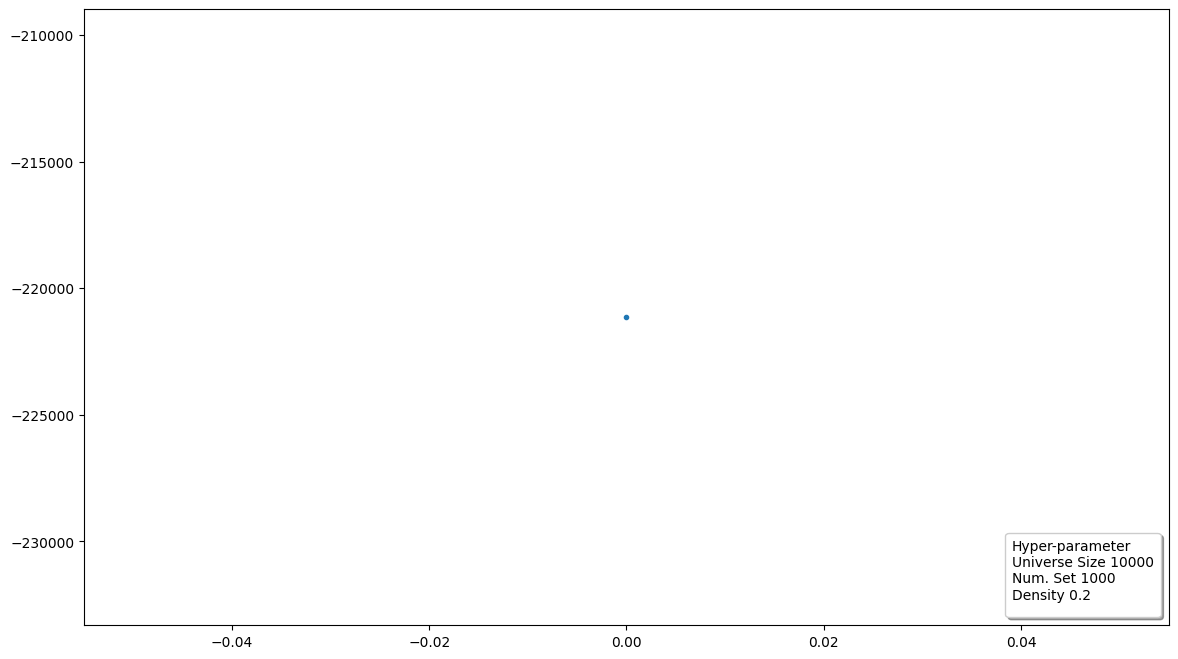

In [158]:
exp_first= experiment_ele[2]
print(exp_first)
experiment(exp_first)

True


In [3]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000          
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int( 100 * DENSITY)]))

# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)